In [ ]:
!nvidia-smi

Mon Nov 30 16:22:08 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Keras RetinaNet setup
importing the git repository

In [ ]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 6205 (delta 1), reused 3 (delta 1), pack-reused 6196
Receiving objects: 100% (6205/6205), 13.48 MiB | 29.30 MiB/s, done.
Resolving deltas: 100% (4197/4197), done.


upgrade keras to latest update

In [ ]:
!pip install keras==2.4

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.4.3)


In [ ]:
%cd keras-retinanet/
!pip install .

[Errno 2] No such file or directory: 'keras-retinanet/'
/content/keras-retinanet
Processing /content/keras-retinanet
ERROR: Operation cancelled by user


setup the model

In [ ]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/keras_retinanet
creating build/temp.linux-x86_64-3.6/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -c keras_retinanet/utils/compute_overlap.c -o build/temp.linux-x86_64-3.6/keras_retinanet/utils/compute_over

In [ ]:
!pip install tensorflow==2.3.0

     |████████████████████████████████| 320.4MB 53kB/s 
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [ ]:
!pip install gdown

In [ ]:
!pip install -U scikit-learn

     |████████████████████████████████| 6.8MB 5.1MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


Usefull libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import urllib
import os
import csv
import cv2
import time
from PIL import Image

from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

print("Setup ready")



Setup ready


Upload dataset into a pands dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown --id 1mOK2qtcY9oNiAhWbOgvj4v8e9FuqcGIB 

Downloading...
From: https://drive.google.com/uc?id=1mOK2qtcY9oNiAhWbOgvj4v8e9FuqcGIB
To: /content/keras-retinanet/imgs.zip
935MB [00:10, 93.5MB/s]


In [ ]:
!unzip imgs.zip

Archive:  imgs.zip
   creating: imgs/test/
  inflating: imgs/test/bookstore_video1_10020.jpg  
  inflating: imgs/test/bookstore_video1_10050.jpg  
  inflating: imgs/test/bookstore_video1_10080.jpg  
  inflating: imgs/test/bookstore_video1_10110.jpg  
  inflating: imgs/test/bookstore_video1_10140.jpg  
  inflating: imgs/test/bookstore_video1_10170.jpg  
  inflating: imgs/test/bookstore_video1_10200.jpg  
  inflating: imgs/test/bookstore_video1_10230.jpg  
  inflating: imgs/test/bookstore_video1_10260.jpg  
  inflating: imgs/test/bookstore_video1_10290.jpg  
  inflating: imgs/test/bookstore_video1_10320.jpg  
  inflating: imgs/test/bookstore_video1_10350.jpg  
  inflating: imgs/test/bookstore_video1_10380.jpg  
  inflating: imgs/test/bookstore_video1_10410.jpg  
  inflating: imgs/test/bookstore_video1_10440.jpg  
  inflating: imgs/test/bookstore_video1_10470.jpg  
  inflating: imgs/test/bookstore_video1_10500.jpg  
  inflating: imgs/test/bookstore_video1_10530.jpg  
  inflating: imgs/tes

In [ ]:
os.makedirs("snapshots", exist_ok=True)

In [ ]:
df = pd.read_csv('train_annotations.csv')
df.head()

,imgs/train/gates_video3_2680.jpg,1083,1146,1189,1238,Human
0,imgs/train/hyang_video6_9000.jpg,57,409,123,454,Human
1,imgs/train/deathCircle_video0_2280.jpg,785,953,830,1030,Human
2,imgs/train/deathCircle_video0_8440.jpg,848,442,885,527,Human
3,imgs/train/deathCircle_video0_5640.jpg,292,1172,319,1217,Human
4,imgs/train/deathCircle_video0_2200.jpg,520,1132,568,1176,Human


In [ ]:
os.makedirs("humans", exist_ok=True)
df2 = pd.DataFrame(df)

#Training phase


In [ ]:
train_df, test_df = train_test_split(df2, test_size=0.2, random_state=RANDOM_SEED)
train_df.head()

,imgs/train/gates_video3_2680.jpg,1083,1146,1189,1238,Human
6424,imgs/train/gates_video3_2760.jpg,312,1197,409,1313,Human
15978,imgs/train/bookstore_video0_3640.jpg,579,963,603,986,Human
4286,imgs/train/deathCircle_video0_11920.jpg,219,1193,264,1249,Human
14481,imgs/train/hyang_video6_8160.jpg,267,363,306,406,Human
16381,imgs/train/hyang_video5_9440.jpg,676,966,731,1024,Human


In [ ]:
test_df.head()

,imgs/train/gates_video3_2680.jpg,1083,1146,1189,1238,Human
4484,imgs/train/bookstore_video3_10440.jpg,172,206,211,240,Human
8360,imgs/train/little_video1_1110.jpg,1189,1191,1215,1248,Human
11082,imgs/train/deathCircle_video0_2640.jpg,688,645,740,714,Human
3302,imgs/train/gates_video3_5720.jpg,151,809,186,867,Human
8409,imgs/train/hyang_video6_5640.jpg,755,58,780,93,Human


In [ ]:
ANNOTATIOS_FILE = 'train_annotations.csv'
CLASSES_FILE = 'classes.csv'

train_df.to_csv(ANNOTATIOS_FILE,index=False, header=None)

classes = set(['Human', 'Car', 'Bus', 'Cart'])

with open(CLASSES_FILE, 'w') as f:
	for i, line in enumerate(sorted(classes)):
		f.write('{}, {}\n'.format(line,i))

In [ ]:
!head classes.csv

Bus, 0
Car, 1
Cart, 2
Human, 3


Train the RetinaNet using own dataset

In [ ]:
!keras_retinanet/bin/train.py \
--steps 500 \
--epoch 10 \
csv train_annotations.csv classes.csv

2020-11-30 18:21:00.503790: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Creating model, this may take a second...
2020-11-30 18:21:05.463445: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-30 18:21:05.470582: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-11-30 18:21:05.471567: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P4 computeCapability: 6.1
coreClock: 1.1135GHz coreCount: 20 deviceMemorySize: 7.43GiB deviceMemoryBandwidth: 178.99GiB/s
2020-11-30 18:21:05.471629: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-30 18:21:05.475107: I 

#Inference model

In [ ]:
!keras_retinanet/bin/convert_model.py snapshots/resnet50_csv_09.h5 snapshots/inference.h5

2020-11-30 17:42:13.471685: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-30 17:42:14.808023: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-30 17:42:14.811621: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-11-30 17:42:14.811910: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P4 computeCapability: 6.1
coreClock: 1.1135GHz coreCount: 20 deviceMemorySize: 7.43GiB deviceMemoryBandwidth: 178.99GiB/s
2020-11-30 17:42:14.811951: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-30 17:42:14.813812: I tensorflow/stream_executor/platform/defaul

In [ ]:
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
from tensorflow import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time
import tensorflow.keras.backend
# use this to change which GPU to use
# gpu = 0

# # set the modified tf session as backend in keras
# setup_gpu(gpu)
# def get_session():
#     config = tf.compat.v1.ConfigProto()
#     config.gpu_options.allow_growth = True
#     return tf.compat.v1.Session(config=config)

# # use this environment flag to change which GPU to use
# #os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# # set the modified tf session as backend in keras
# tf.compat.v1.keras.backend.get_session()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
model_path = os.path.join('snapshots', sorted(os.listdir('snapshots'), reverse=True)[0])
print(model_path)

snapshots/resnet50_csv_09.h5


In [ ]:
model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)
labels_to_names = pd.read_csv(CLASSES_FILE, header=None).T.loc[0].to_dict()

ResourceExhaustedError: ignored

In [ ]:

# keras_retinanet.models.backbone('resnet50').retinanet(num_classes=4)
# model.compile(
#     loss={
#         'regression'    : keras_retinanet.losses.smooth_l1(),
#         'classification': keras_retinanet.losses.focal()
#     },
#     optimizer=keras.optimizers.Adam(lr=1e-5, clipnorm=0.001)
# )

# print(model.summary())
# labels_to_names = {0: 'Bus', 1: 'Car', 2: 'Cart', 3: 'Human'}

processing time:  2.2489356994628906


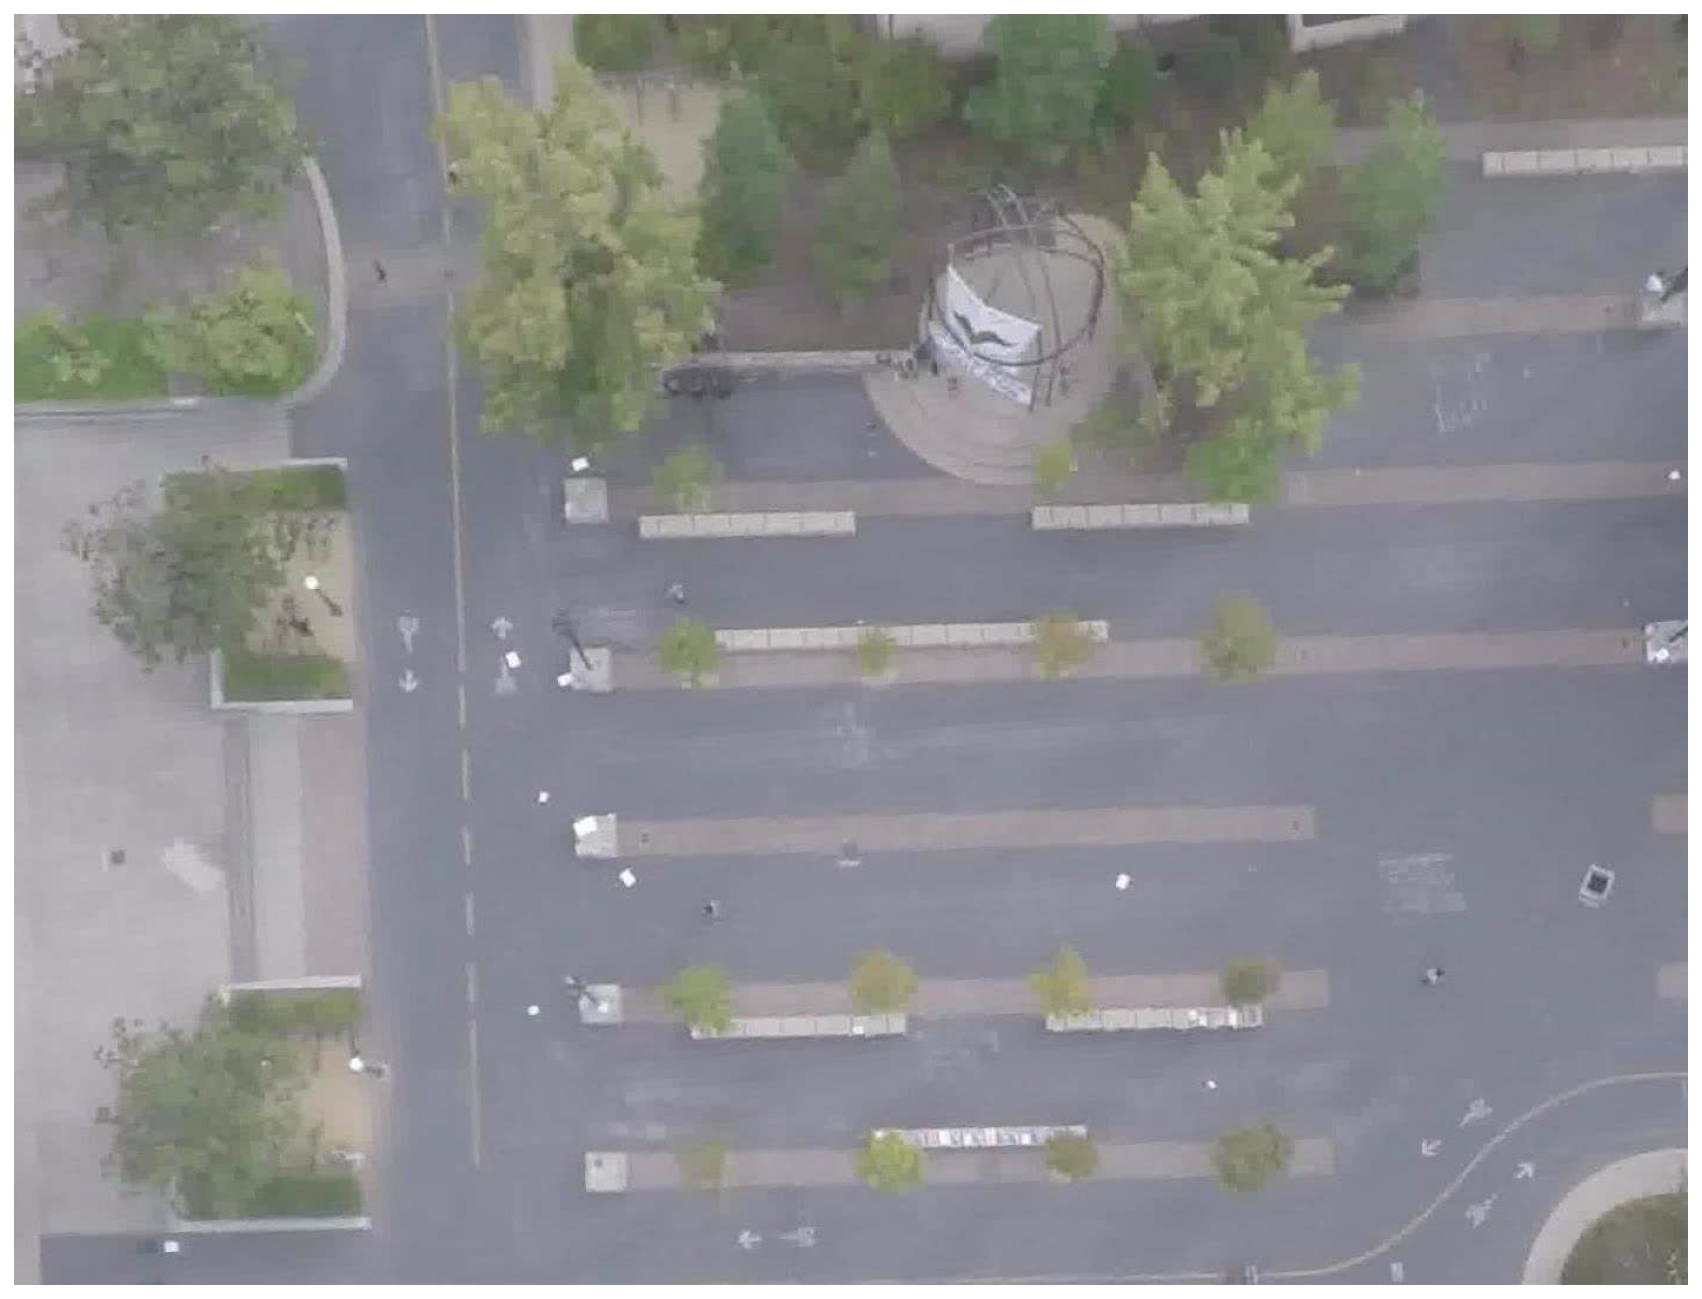

In [ ]:
image = read_image_bgr('imgs/test/bookstore_video1_10380.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()